In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

./.DS_Store
./.gitignore
./ecg_plot_test.py
./example_ecg.mat
./example_ecg.png
./grid.png
./LICENCE
./README.md
./S0001.hea
./S0001.mat
./setup.py
./show_tmp_file_1.svg
./Test package.ipynb
./.git\COMMIT_EDITMSG
./.git\config
./.git\description
./.git\FETCH_HEAD
./.git\HEAD
./.git\index
./.git\packed-refs
./.git\hooks\applypatch-msg.sample
./.git\hooks\commit-msg.sample
./.git\hooks\fsmonitor-watchman.sample
./.git\hooks\post-update.sample
./.git\hooks\pre-applypatch.sample
./.git\hooks\pre-commit.sample
./.git\hooks\pre-merge-commit.sample
./.git\hooks\pre-push.sample
./.git\hooks\pre-rebase.sample
./.git\hooks\pre-receive.sample
./.git\hooks\prepare-commit-msg.sample
./.git\hooks\update.sample
./.git\info\exclude
./.git\logs\HEAD
./.git\logs\refs\heads\master
./.git\logs\refs\remotes\origin\HEAD
./.git\logs\refs\remotes\origin\master
./.git\logs\refs\remotes\upstream\master
./.git\objects\0b\823d6e7506b4e8bbecad7583c004bb4e833a27
./.git\objects\13\6182417b9c0461a7ec92ba08589ca163bf0

In [2]:
import os
import numpy as np, sys,os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat
import wfdb
import tarfile
#import wget
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import StratifiedKFold
#from keras.preprocessing.sequence import pad_sequences
import math
import warnings



def load_challenge_data(filename):
    x = loadmat(filename)
    data = np.asarray(x['val'], dtype=np.float64)
    new_file = filename.replace('.mat','.hea')
    input_header_file = os.path.join(new_file)
    with open(input_header_file,'r') as f:
        header_data=f.readlines()
    return data, header_data


def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [3]:
import neurokit2 as nk

In [12]:
data, header_data = load_challenge_data("./S0001.mat")

In [13]:
header_data

['S0001 12 1000 38400 15-May-2020 15:22:05\n',
 'S0001.mat 16+24 2000000/mV 16 0 -245 -3730 0 I\n',
 'S0001.mat 16+24 2000000/mV 16 0 -229 -8032 0 II\n',
 'S0001.mat 16+24 2000000/mV 16 0 16 4606 0 III\n',
 'S0001.mat 16+24 2000000/mV 16 0 237 781 0 aVR\n',
 'S0001.mat 16+24 2000000/mV 16 0 -130 4144 0 aVL\n',
 'S0001.mat 16+24 2000000/mV 16 0 -107 -8157 0 aVF\n',
 'S0001.mat 16+24 2000000/mV 16 0 -44 -9547 0 V1\n',
 'S0001.mat 16+24 2000000/mV 16 0 -121 1335 0 V2\n',
 'S0001.mat 16+24 2000000/mV 16 0 -56 -7472 0 V3\n',
 'S0001.mat 16+24 2000000/mV 16 0 106 -7233 0 V4\n',
 'S0001.mat 16+24 2000000/mV 16 0 197 -1491 0 V5\n',
 'S0001.mat 16+24 2000000/mV 16 0 195 -7532 0 V6\n',
 '#Age: 81\n',
 '#Sex: female\n',
 '#Dx: 164865005\n',
 '#Rx: Unknown\n',
 '#Hx: Unknown\n',
 '#Sx: Unknown\n']

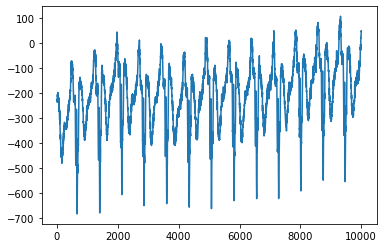

In [156]:
plt.plot(data[:,0:10000][1])

In [253]:
%load_ext autoreload
%autoreload 2
import ecg_plot

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
cleaned = nk.ecg_clean(data[8], sampling_rate=500, method="neurokit")

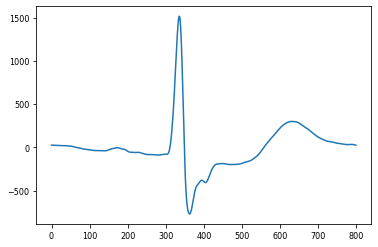

In [34]:
plt.plot(cleaned[300:1100])

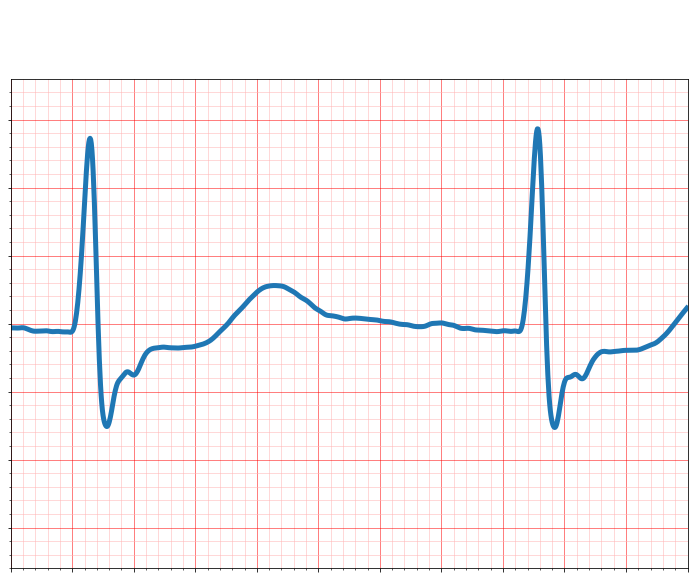

In [254]:
ecg_plot.plot_1(cleaned[1250:2350]*(1/1000), 500, " ",10,10,5)

In [194]:
all_ecgs = np.empty([3,10000])

In [195]:
all_ecgs[0] = 

array([1.35098560e-311, 1.35098620e-311, 1.80423000e+002, ...,
       6.45506667e+002, 2.29457700e+003, 6.45960000e+002])

In [256]:
import matplotlib.pyplot as plt
import numpy as np


Fs = 10000
f = 500
sample = 10000
x = np.arange(sample)
y = np.sin(2 * np.pi * f * x / Fs)

all_ecgs[0] = cleaned[0:10000]*(1/1000)+(y*0.2)
ecg_plot.plot_1(cleaned[0:10000]*(1/1000)+(y*0.2), 1000, title=" ", fig_height=4,line_w=1.2)
ecg_plot.save_as_png("plots/50hz_noise", dpi = 300, layout='tight')

In [257]:
import matplotlib.pyplot as plt
import numpy as np


Fs = 10000
f = 2
sample = 10000
x = np.arange(sample)
y = np.sin(2 * np.pi * f * x / Fs)

all_ecgs[1] = cleaned[0:10000]*(1/1000)+(y)
ecg_plot.plot_1(cleaned[0:10000]*(1/1000)+(y), 1000, title=" ", fig_height=4, line_w=1)

ecg_plot.save_as_png("plots/respiratory_noise", dpi = 300, layout='tight')

In [258]:

ecg_plot.plot_1(nk.signal.signal_distort(
    data[:,0:10000][8],
    sampling_rate=1000,
    noise_shape="laplace",
    noise_amplitude=0.0,
    noise_frequency=100,
    powerline_amplitude=0,
    powerline_frequency=50,
    artifacts_amplitude=0.9,
    artifacts_frequency=100,
    artifacts_number=20,
    linear_drift=False,
    random_state=None,
    silent=False,
) *(1/1000) , 1000, title=" ", fig_height=4,line_w=1)

all_ecgs[2] = nk.signal.signal_distort(
    data[:,0:10000][8],
    sampling_rate=1000,
    noise_shape="laplace",
    noise_amplitude=0.0,
    noise_frequency=100,
    powerline_amplitude=0,
    powerline_frequency=50,
    artifacts_amplitude=0.9,
    artifacts_frequency=100,
    artifacts_number=20,
    linear_drift=False,
    random_state=None,
    silent=False,
) *(1/1000)
ecg_plot.save_as_png("plots/artifacts", dpi = 300, layout='tight')

In [211]:
all_ecgs.shape

(3, 10000)

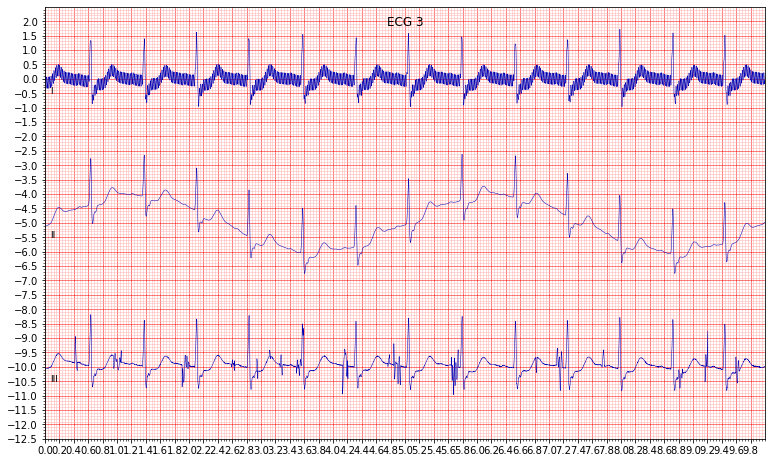

In [214]:
ecg_plot.plot(all_ecgs, 
        sample_rate    = 1000, 
        title          = 'ECG 3', 
        lead_index     = ["I","II","III"], 
        lead_order     = None,
        style          = None,
        columns        = 1,
        row_height     = 10,
        show_lead_name = True,
        show_grid      = True,
        show_separate_line  = False)